# Data Truth & Joining Datasets
### Stephen Alger 
### March 5 2021
---
### Visualisation Objective: Irish General Election Results 2016
> Data Source(s): <br>
> https://data.gov.ie/dataset/candidate-details-for-general-election-2016 <br>
> https://data.gov.ie/dataset/general-election-2016-constituency-details <br>
> https://data.gov.ie/dataset/general-election-2016-count-details <br>
---


In [1]:
#Dependency Installation & Loading
install.packages("sqldf")
install.packages("cowplot")
install.packages("viridis")
install.packages("tidyverse")

library(viridis)
library(tidyverse)
library(cowplot)
library(sqldf)

#Set Environment Plot Size:
options(repr.plot.width=15, repr.plot.height=15)

#Define my Own Theme                           
my_Theme <- theme(plot.title = element_text(face="bold",size=40),
                  plot.subtitle = element_text(face="italic", size = 20),
                  axis.title = element_text(face="bold",size=20),
                  axis.text = element_text(size=20),
                  plot.caption = element_text(size = 16),
                  legend.title = element_text(size = 16),
                  legend.text  = element_text(size = 14))


The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2xhnMb/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2xhnMb/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2xhnMb/downloaded_packages

The downloaded binary packages are in
	/var/folders/tj/n0crv2hj7zj5vxqbn5kjllf80000gn/T//Rtmp2xhnMb/downloaded_packages


Loading required package: viridisLite

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gsubfn

Loading required package: proto

Warning message in doTryCatch(return(expr), name, parentenv, handler):
“unable to load shared object '/Library/Frameworks/R.framework/Resources/modules//R_X11.so':
  dlopen(/Library/Frameworks/R.framework/Resources/modules//R_X11.so, 6): Library not loaded: /opt/X11/lib/libSM.6.dylib
  Referenced from: /Library/Frameworks/R.framework/Versions/3.6/Resources/modules/R_X11.so
  Reason: image not found”
Could not load tcltk.  Will use slower R code instead.

Loading required package: RSQLite



---
# Utility Work: Load Data & Investigate The Dataset Characteristics 📩


In [16]:
# Input File Names:
candidateFilePath = "./data/GE2016-candidate-details.csv"
constituencyFilePath = "./data/GE2016constituencydetails.csv"
electionCountFilePath = "./data/GE2016-count-details.csv"

In [17]:
#Candidate Data Set CSV into canddf - candidate dataframe
canddf <- read.csv(candidateFilePath, sep = ",", fileEncoding="latin1")
head(canddf)

#Check for NA Values - None Returned
which(is.na(canddf)) 

,Constituency,Surname,First.Name,Gender,Party,Party.Abbreviation,Count.Number,Required.To.Reach.Quota,Required.To.Save.Deposit,Votes,Result,Candidate.Id,Constituency.Number,Constituency.Ainm
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>
1,Galway West,Ó Cuív,Éamon,M,Fianna Fáil,F.F.,14,0,0,9539,Elected,165,23,Gaillimh Thiar
2,Louth,Adams,Gerry,M,Sinn Féin,S.F.,11,0,0,10661,Elected,160,31,Lú
3,Cork East,Ahern,Barbara,F,Fianna Fáil,F.F.,10,3781,0,4594,,169,4,Corcaigh Thoir
4,Waterford,Ahmed,Sheik Mohiuddin,M,Non-Party,NON-P.,9,0,2443,140,Excluded,160,38,Port Lairge
5,Dublin Mid-West,Akpoveta,Patrick,M,Non-Party,NON-P.,12,0,1813,288,Excluded,187,643,Baile Átha Cliath Thiar-Meán
6,Tipperary,Ambrose,Siobhán,F,Fianna Fáil,F.F.,7,0,0,4472,Excluded,160,36,Tiobraid Árann


integer(0)

---
# Part One - Candidate Data Observation 🔎⚠️

In [18]:
# 1-a) SQL Query Style Execution: Get First&Surnames of Candidates in The Wexford Constituency 👍
wexfordCandidates = sqldf('Select Constituency, Surname,"First.Name" from canddf where Constituency = "Wexford"')
wexfordCandidates

Constituency,Surname,First.Name
<fct>,<fct>,<fct>
Wexford,Browne,James
Wexford,Byrne,Aoife
Wexford,Byrne,Malcolm
Wexford,Carthy,Ger
Wexford,D'arcy,Michael
Wexford,Dwyer,John
Wexford,Foxe,Caroline
Wexford,Hogan,Julie
Wexford,Howlin,Brendan


In [19]:
# 1-b) Get The Number of Candidates for the Laois Constituency: 👍
distinctLaoisCandidatesA = sqldf('Select DISTINCT "First.Name","Surname" from canddf where Constituency = "Laois"')
cat("The Laois Constituency Had:", nrow(distinctLaoisCandidatesA), "Candidates in the 2016 General Election. - canddf")

The Laois Constituency Had: 6 Candidates in the 2016 General Election. - canddf

In [20]:
# 1-c) Get Total Number of Constituencies
countConstituenciesA = sqldf('Select * from canddf ORDER BY Constituency ASC')
cat("In the 2016 General Election there were", nrow(countConstituenciesA), "Constituencies - canddf")

In the 2016 General Election there were 551 Constituencies - canddf

In [21]:
# 1-c Continued) Get Total Number of Distinct Constituencies
distinctConstituenciesA = sqldf('Select DISTINCT Constituency from canddf ORDER BY Constituency ASC')
cat("In the 2016 General Election there were", nrow(distinctConstituenciesA), "Distinct Constituencies - canddf")

In the 2016 General Election there were 40 Distinct Constituencies - canddf

---
# Part Two - Constituency Data Observation 🔎⚠️

In [22]:
#Constituency Data Set CSV into constdf - constituency dataframe
constdf <- read.csv(constituencyFilePath, sep = ",", fileEncoding="latin1")
head(constdf)

#Check for NA Values - None Returned
which(is.na(constdf)) 

,Constituency.Name,Constituency.Ainm,Count.Number,Date.Of.Election,Number.Of.Candidates,Number.of.Seats,Quota,Required.Save.Deposit,Seats.Filled,Seats.in.Constituency,Spoiled,Total.Electorate,Total.Poll,Valid.Poll,Constituency.Number
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Carlow Kilkenny,Ceatharlach-Cill Chainnigh,11,26/02/2016,15,5,11669,2918,5,5,505,107023,70514,70009,1
2,Cavan Monaghan,An Cabhán-Muineachán,10,26/02/2016,15,4,11931,2983,4,4,598,90618,60248,59650,2
3,Clare,An Clár,12,26/02/2016,16,4,11401,2851,4,4,407,83660,57407,57000,3
4,Cork East,Corcaigh Thoir,10,26/02/2016,15,4,10562,2641,4,4,445,83236,53251,52806,4
5,Cork North Central,Corcaigh Thuaidh-Lár,11,26/02/2016,14,4,10235,2559,4,4,516,81609,51690,51174,5
6,Cork North West,Corcaigh Thiar Thuaidh,9,26/02/2016,13,3,11740,2936,3,3,395,67589,47353,46958,6


integer(0)

In [23]:
# 2-a) Get the number of constituencies in this dataset -> constituency dataset
countConstituenciesB = sqldf('Select DISTINCT "Constituency.Name" from constdf ORDER BY "Constituency.Name" ASC')
cat("In the 2016 General Election there were", nrow(countConstituenciesB), "Constituencies - constdf")

In the 2016 General Election there were 40 Constituencies - constdf

### Observation - Hyphenantion Versus Whitespcae in Dataframes!
>Fix this with a substitution of a " " for each "-" in the Canddf.


In [24]:
# Output Shows many Hyphens used in place of whitespace:
unique(canddf$Constituency)

[1] Galway West          Louth                Cork  East          
 [4] Waterford            Dublin Mid-West      Tipperary           
 [7] Dublin Bay South     Dublin South-Central Carlow-Kilkenny     
[10] Dún Laoghaire        Longford-Westmeath   Cork North-Central  
[13] Wicklow              Kildare North        Limerick City       
[16] Cork South-Central   Meath East           Offaly              
[19] Kerry                Sligo-Leitrim        Clare               
[22] Dublin South-West    Dublin Bay North     Wexford             
[25] Limerick County      Dublin Central       Dublin West         
[28] Meath West           Cavan-Monaghan       Mayo                
[31] Galway East          Dublin North-West    Dublin Fingal       
[34] Cork South-West      Roscommon-Galway     Cork North-West     
[37] Laois                Kildare South        Dublin Rathdown     
[40] Donegal             
40 Levels: Carlow-Kilkenny Cavan-Monaghan Clare ... Wicklow

In [25]:
# 2-b) Map Hyphens to Whitespace for Normalisation 
canddf$Constituency <- gsub('-', ' ', canddf$Constituency)
unique(canddf$Constituency)

[1] "Galway West"          "Louth"                "Cork  East"          
 [4] "Waterford"            "Dublin Mid West"      "Tipperary"           
 [7] "Dublin Bay South"     "Dublin South Central" "Carlow Kilkenny"     
[10] "Dún Laoghaire"        "Longford Westmeath"   "Cork North Central"  
[13] "Wicklow"              "Kildare North"        "Limerick City"       
[16] "Cork South Central"   "Meath East"           "Offaly"              
[19] "Kerry"                "Sligo Leitrim"        "Clare"               
[22] "Dublin South West"    "Dublin Bay North"     "Wexford"             
[25] "Limerick County"      "Dublin Central"       "Dublin West"         
[28] "Meath West"           "Cavan Monaghan"       "Mayo"                
[31] "Galway East"          "Dublin North West"    "Dublin Fingal"       
[34] "Cork South West"      "Roscommon Galway"     "Cork North West"     
[37] "Laois"                "Kildare South"        "Dublin Rathdown"     
[40] "Donegal"

In [26]:
# Column Naming is not harmonised across Canddf and Constdf (canddf$Constituency != constdf$Constituency.Name)
colnames(canddf)
colnames(constdf)

[1] "Constituency"             "Surname"                 
 [3] "First.Name"               "Gender"                  
 [5] "Party"                    "Party.Abbreviation"      
 [7] "Count.Number"             "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Votes"                   
[11] "Result"                   "Candidate.Id"            
[13] "Constituency.Number"      "Constituency.Ainm"

[1] "Constituency.Name"     "Constituency.Ainm"     "Count.Number"         
 [4] "Date.Of.Election"      "Number.Of.Candidates"  "Number.of.Seats"      
 [7] "Quota"                 "Required.Save.Deposit" "Seats.Filled"         
[10] "Seats.in.Constituency" "Spoiled"               "Total.Electorate"     
[13] "Total.Poll"            "Valid.Poll"            "Constituency.Number"

In [27]:
# 2-b continued) Where canddf column name == Constituency replace with 'Constituency.Name'
colnames(canddf)[colnames(canddf) == 'Constituency'] <- 'Constituency.Name'
colnames(canddf)
colnames(constdf)

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Gender"                  
 [5] "Party"                    "Party.Abbreviation"      
 [7] "Count.Number"             "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Votes"                   
[11] "Result"                   "Candidate.Id"            
[13] "Constituency.Number"      "Constituency.Ainm"

[1] "Constituency.Name"     "Constituency.Ainm"     "Count.Number"         
 [4] "Date.Of.Election"      "Number.Of.Candidates"  "Number.of.Seats"      
 [7] "Quota"                 "Required.Save.Deposit" "Seats.Filled"         
[10] "Seats.in.Constituency" "Spoiled"               "Total.Electorate"     
[13] "Total.Poll"            "Valid.Poll"            "Constituency.Number"

---
# Part Three - Count Data 🧮

In [28]:
#Count Data Set CSV into countdf - election count dataframe
countdf <- read.csv(electionCountFilePath, sep = ",", fileEncoding="latin1")
head(countdf)

#Check for NA Values - None Returned
which(is.na(countdf)) 

,Constituency.Name,Candidate.surname,Candidate.First.Name,Result,Count.Number,Non_Transferable,Occurred.On.Count,Required.To.Reach.Quota,Required.To.Save.Deposit,Transfers,Votes,Total.Votes,Constituency.Number,Candidate.Id
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Louth,Adams,Gerry,,1,0,0,594,0,0,10661,10661,31,160
2,Louth,Adams,Gerry,,2,0,0,481,0,113,10661,10774,31,160
3,Louth,Adams,Gerry,,3,0,0,429,0,52,10661,10826,31,160
4,Louth,Adams,Gerry,,4,0,0,347,0,82,10661,10908,31,160
5,Louth,Adams,Gerry,,5,0,0,159,0,188,10661,11096,31,160
6,Louth,Adams,Gerry,Elected,7,0,6,0,0,0,10661,11278,31,160


integer(0)

In [56]:
# 3-a) How many Laois Candidate Entries according to the countdf?
LaoisCandidatesB = sqldf('Select * from countdf where "Constituency.Name" = "Laois"')
cat("The Laois Constituency Had:", nrow(LaoisCandidatesB), "Candidates in the 2016 General Election. - countdf")

The Laois Constituency Had: 18 Candidates in the 2016 General Election. - countdf

In [30]:
# 3-a) How many Disctinct Laois Candidates according to the countdf?
distinctLaoisCandidatesB = sqldf('Select DISTINCT "Candidate.First.Name","Candidate.surname" from countdf where "Constituency.Name" = "Laois"')
cat("The Laois Constituency Had:", nrow(distinctLaoisCandidatesB), "Distinct Candidates in the 2016 General Election. - countdf")

The Laois Constituency Had: 6 Distinct Candidates in the 2016 General Election. - countdf

In [31]:
#Check For Inconsistency

# Examine Colnames
colnames(countdf)
colnames(constdf)


[1] "Constituency.Name"        "Candidate.surname"       
 [3] "Candidate.First.Name"     "Result"                  
 [5] "Count.Number"             "Non_Transferable"        
 [7] "Occurred.On.Count"        "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Transfers"               
[11] "Votes"                    "Total.Votes"             
[13] "Constituency.Number"      "Candidate.Id"

[1] "Constituency.Name"     "Constituency.Ainm"     "Count.Number"         
 [4] "Date.Of.Election"      "Number.Of.Candidates"  "Number.of.Seats"      
 [7] "Quota"                 "Required.Save.Deposit" "Seats.Filled"         
[10] "Seats.in.Constituency" "Spoiled"               "Total.Electorate"     
[13] "Total.Poll"            "Valid.Poll"            "Constituency.Number"

In [32]:
# Examine Sumarries
summary(constdf$Constituency.Name)
summary(countdf$Constituency.Name)

Carlow Kilkenny       Cavan Monaghan                Clare 
                   1                    1                    1 
           Cork East   Cork North Central      Cork North West 
                   1                    1                    1 
  Cork South Central      Cork South West              Donegal 
                   1                    1                    1 
    Dublin Bay North     Dublin Bay South       Dublin Central 
                   1                    1                    1 
       Dublin Fingal      Dublin Mid West    Dublin North West 
                   1                    1                    1 
     Dublin Rathdown Dublin South Central    Dublin South West 
                   1                    1                    1 
         Dublin West        Dún Laoghaire          Galway East 
                   1                    1                    1 
         Galway West                Kerry        Kildare North 
                   1                    1                    1 
       Kildare South                Laois        Limerick City 
                   1                    1                    1 
     Limerick County   Longford Westmeath                Louth 
                   1                    1                    1 
                Mayo           Meath East           Meath West 
                   1                    1                    1 
              Offaly     Roscommon Galway        Sligo Leitrim 
                   1                    1                    1 
           Tipperary            Waterford              Wexford 
                   1                    1                    1 
             Wicklow 
                   1

Carlow Kilkenny       Cavan Monaghan                Clare 
                 165                  150                  192 
           Cork East   Cork North Central      Cork North West 
                 150                  154                  117 
  Cork South Central      Cork South West              Donegal 
                 165                   55                  208 
    Dublin Bay North     Dublin Bay South       Dublin Central 
                 300                  112                  165 
       Dublin Fingal      Dublin Mid West    Dublin North West 
                 150                  180                   99 
     Dublin Rathdown Dublin South Central    Dublin South West 
                  54                  143                  336 
         Dublin West        Dún Laoghaire          Galway East 
                  55                   77                   70 
         Galway West                Kerry        Kildare North 
                 280                  176                  126 
       Kildare South                Laois        Limerick City 
                  54                   18                   66 
     Limerick County   Longford Westmeath                Louth 
                  60                  270                  176 
                Mayo           Meath East           Meath West 
                 160                  108                   54 
              Offaly     Roscommon Galway        Sligo Leitrim 
                  77                   96                  270 
           Tipperary            Waterford              Wexford 
                  91                  108                  238 
             Wicklow 
                 160

In [33]:
# print("Both Have correct constituency counts") ✅
nrow(distinctConstituenciesA)
nrow(sqldf('Select DISTINCT "Constituency.Name" from countdf'))

[1] 40

[1] 40

In [34]:
# Output Samples of Each
head(constdf)
head(countdf)

,Constituency.Name,Constituency.Ainm,Count.Number,Date.Of.Election,Number.Of.Candidates,Number.of.Seats,Quota,Required.Save.Deposit,Seats.Filled,Seats.in.Constituency,Spoiled,Total.Electorate,Total.Poll,Valid.Poll,Constituency.Number
,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Carlow Kilkenny,Ceatharlach-Cill Chainnigh,11,26/02/2016,15,5,11669,2918,5,5,505,107023,70514,70009,1
2,Cavan Monaghan,An Cabhán-Muineachán,10,26/02/2016,15,4,11931,2983,4,4,598,90618,60248,59650,2
3,Clare,An Clár,12,26/02/2016,16,4,11401,2851,4,4,407,83660,57407,57000,3
4,Cork East,Corcaigh Thoir,10,26/02/2016,15,4,10562,2641,4,4,445,83236,53251,52806,4
5,Cork North Central,Corcaigh Thuaidh-Lár,11,26/02/2016,14,4,10235,2559,4,4,516,81609,51690,51174,5
6,Cork North West,Corcaigh Thiar Thuaidh,9,26/02/2016,13,3,11740,2936,3,3,395,67589,47353,46958,6


,Constituency.Name,Candidate.surname,Candidate.First.Name,Result,Count.Number,Non_Transferable,Occurred.On.Count,Required.To.Reach.Quota,Required.To.Save.Deposit,Transfers,Votes,Total.Votes,Constituency.Number,Candidate.Id
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Louth,Adams,Gerry,,1,0,0,594,0,0,10661,10661,31,160
2,Louth,Adams,Gerry,,2,0,0,481,0,113,10661,10774,31,160
3,Louth,Adams,Gerry,,3,0,0,429,0,52,10661,10826,31,160
4,Louth,Adams,Gerry,,4,0,0,347,0,82,10661,10908,31,160
5,Louth,Adams,Gerry,,5,0,0,159,0,188,10661,11096,31,160
6,Louth,Adams,Gerry,Elected,7,0,6,0,0,0,10661,11278,31,160


In [35]:
# Check Constinuecy Naming and Numbering is constant across datasets ✅
checkSample1 <- subset(constdf, select = c("Constituency.Name", "Constituency.Number"), Constituency.Name == "Clare")
checkSample2 <- subset(countdf, select = c("Constituency.Name", "Constituency.Number"), Constituency.Name == "Clare")
print(checkSample1)

  Constituency.Name Constituency.Number
3             Clare                   3


In [36]:
#Check Canddf vs Countdf
head(countdf)
head(canddf)

,Constituency.Name,Candidate.surname,Candidate.First.Name,Result,Count.Number,Non_Transferable,Occurred.On.Count,Required.To.Reach.Quota,Required.To.Save.Deposit,Transfers,Votes,Total.Votes,Constituency.Number,Candidate.Id
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Louth,Adams,Gerry,,1,0,0,594,0,0,10661,10661,31,160
2,Louth,Adams,Gerry,,2,0,0,481,0,113,10661,10774,31,160
3,Louth,Adams,Gerry,,3,0,0,429,0,52,10661,10826,31,160
4,Louth,Adams,Gerry,,4,0,0,347,0,82,10661,10908,31,160
5,Louth,Adams,Gerry,,5,0,0,159,0,188,10661,11096,31,160
6,Louth,Adams,Gerry,Elected,7,0,6,0,0,0,10661,11278,31,160


,Constituency.Name,Surname,First.Name,Gender,Party,Party.Abbreviation,Count.Number,Required.To.Reach.Quota,Required.To.Save.Deposit,Votes,Result,Candidate.Id,Constituency.Number,Constituency.Ainm
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>
1,Galway West,Ó Cuív,Éamon,M,Fianna Fáil,F.F.,14,0,0,9539,Elected,165,23,Gaillimh Thiar
2,Louth,Adams,Gerry,M,Sinn Féin,S.F.,11,0,0,10661,Elected,160,31,Lú
3,Cork East,Ahern,Barbara,F,Fianna Fáil,F.F.,10,3781,0,4594,,169,4,Corcaigh Thoir
4,Waterford,Ahmed,Sheik Mohiuddin,M,Non-Party,NON-P.,9,0,2443,140,Excluded,160,38,Port Lairge
5,Dublin Mid West,Akpoveta,Patrick,M,Non-Party,NON-P.,12,0,1813,288,Excluded,187,643,Baile Átha Cliath Thiar-Meán
6,Tipperary,Ambrose,Siobhán,F,Fianna Fáil,F.F.,7,0,0,4472,Excluded,160,36,Tiobraid Árann


In [37]:
#Fix Column Inconsistency
colnames(countdf)[colnames(countdf) == 'Candidate.First.Name'] <- 'First.Name'
colnames(countdf)[colnames(countdf) == 'Candidate.surname'] <- 'Surname'

#Check fix
colnames(countdf)
colnames(canddf)
# Normalised Col Names ✅

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Result"                  
 [5] "Count.Number"             "Non_Transferable"        
 [7] "Occurred.On.Count"        "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Transfers"               
[11] "Votes"                    "Total.Votes"             
[13] "Constituency.Number"      "Candidate.Id"

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Gender"                  
 [5] "Party"                    "Party.Abbreviation"      
 [7] "Count.Number"             "Required.To.Reach.Quota" 
 [9] "Required.To.Save.Deposit" "Votes"                   
[11] "Result"                   "Candidate.Id"            
[13] "Constituency.Number"      "Constituency.Ainm"

---
# Part Four: Merge 🔀

In [38]:
# 4-a
df <- merge(constdf, countdf, by=c("Constituency.Name", "Count.Number", "Constituency.Number"))
df <- merge(canddf, df, by=c("Constituency.Name", "Surname", "First.Name", "Count.Number", "Constituency.Number", "Constituency.Ainm" , "Required.To.Reach.Quota", "Required.To.Save.Deposit", "Votes", "Result", "Candidate.Id"))

In [39]:
colnames(df)

[1] "Constituency.Name"        "Surname"                 
 [3] "First.Name"               "Count.Number"            
 [5] "Constituency.Number"      "Constituency.Ainm"       
 [7] "Required.To.Reach.Quota"  "Required.To.Save.Deposit"
 [9] "Votes"                    "Result"                  
[11] "Candidate.Id"             "Gender"                  
[13] "Party"                    "Party.Abbreviation"      
[15] "Date.Of.Election"         "Number.Of.Candidates"    
[17] "Number.of.Seats"          "Quota"                   
[19] "Required.Save.Deposit"    "Seats.Filled"            
[21] "Seats.in.Constituency"    "Spoiled"                 
[23] "Total.Electorate"         "Total.Poll"              
[25] "Valid.Poll"               "Non_Transferable"        
[27] "Occurred.On.Count"        "Transfers"               
[29] "Total.Votes"

In [40]:
#Format Colnames As In lab
colnames(df)[colnames(df) == 'Surname'] <- 'Candidate.surname'
colnames(df)[colnames(df) == 'First.Name'] <- 'Candidate.First.Name'
colnames(df)

[1] "Constituency.Name"        "Candidate.surname"       
 [3] "Candidate.First.Name"     "Count.Number"            
 [5] "Constituency.Number"      "Constituency.Ainm"       
 [7] "Required.To.Reach.Quota"  "Required.To.Save.Deposit"
 [9] "Votes"                    "Result"                  
[11] "Candidate.Id"             "Gender"                  
[13] "Party"                    "Party.Abbreviation"      
[15] "Date.Of.Election"         "Number.Of.Candidates"    
[17] "Number.of.Seats"          "Quota"                   
[19] "Required.Save.Deposit"    "Seats.Filled"            
[21] "Seats.in.Constituency"    "Spoiled"                 
[23] "Total.Electorate"         "Total.Poll"              
[25] "Valid.Poll"               "Non_Transferable"        
[27] "Occurred.On.Count"        "Transfers"               
[29] "Total.Votes"

In [41]:
#Drop unneccesary columns
df <- subset(df, select = c("Candidate.First.Name", "Candidate.surname", "Constituency.Name", "Constituency.Number", "Count.Number", "Gender", "Number.Of.Candidates", "Number.of.Seats", "Party.Abbreviation", "Party", "Quota", "Result", "Seats.in.Constituency", "Total.Votes", "Votes"))

In [42]:
#4-a) Check Formatting ✅
colnames(df)

[1] "Candidate.First.Name"  "Candidate.surname"     "Constituency.Name"    
 [4] "Constituency.Number"   "Count.Number"          "Gender"               
 [7] "Number.Of.Candidates"  "Number.of.Seats"       "Party.Abbreviation"   
[10] "Party"                 "Quota"                 "Result"               
[13] "Seats.in.Constituency" "Total.Votes"           "Votes"

In [43]:
head(df)

,Candidate.First.Name,Candidate.surname,Constituency.Name,Constituency.Number,Count.Number,Gender,Number.Of.Candidates,Number.of.Seats,Party.Abbreviation,Party,Quota,Result,Seats.in.Constituency,Total.Votes,Votes
,<fct>,<fct>,<chr>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>
1,Bobby,Aylward,Carlow Kilkenny,1,11,M,15,5,F.F.,Fianna Fáil,11669,Elected,5,11335,9366
2,Pat,Deering,Carlow Kilkenny,1,11,M,15,5,F.G.,Fine Gael,11669,Elected,5,11149,6562
3,David,Fitzgerald,Carlow Kilkenny,1,11,M,15,5,F.G.,Fine Gael,11669,Excluded,5,0,5017
4,Kathleen,Funchion,Carlow Kilkenny,1,11,F,15,5,S.F.,Sinn Féin,11669,Elected,5,11720,8700
5,Keith Martin,Gilligan,Carlow Kilkenny,1,11,M,15,5,NON-P.,Non-Party,11669,Excluded,5,0,456
6,Conor,Mac Liam,Carlow Kilkenny,1,11,M,15,5,AAA-PBP,Anti-Austerity Alliance - People Before Profit,11669,Excluded,5,0,1120


In [44]:
nrow(sqldf('Select * from df where Result = "Elected" OR "elected"'))

[1] 151

In [45]:
# 4-b) Generate a new dataframe, edf, of elected candidates, 
# with each elected candidate now appearing only once. 
# This dataframe should include the columns Candidate.First.Name, 
# Candidate.surname, Constituency.Name, Gender, Party, Party.Abbreviation
edf = sqldf('Select "Candidate.First.Name","Candidate.surname", "Constituency.Name", "Gender", "Party", "Party.Abbreviation" from df where Result = "Elected"')

In [46]:
head(edf)

,Candidate.First.Name,Candidate.surname,Constituency.Name,Gender,Party,Party.Abbreviation
,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
1,Bobby,Aylward,Carlow Kilkenny,M,Fianna Fáil,F.F.
2,Pat,Deering,Carlow Kilkenny,M,Fine Gael,F.G.
3,Kathleen,Funchion,Carlow Kilkenny,F,Sinn Féin,S.F.
4,John,McGuinness,Carlow Kilkenny,M,Fianna Fáil,F.F.
5,John Paul,Phelan,Carlow Kilkenny,M,Fine Gael,F.G.
6,Heather,Humphreys,Cavan Monaghan,F,Fine Gael,F.G.


---
# Part 5 Functionification & SQLisation 😂

In [47]:
fetchConstituencyElectedCandidates <- function(Constituency) {
    electedCandidateDF = fn$sqldf('SELECT "Candidate.First.Name","Candidate.surname","Constituency.Name","Gender","Party","Party.Abbreviation" FROM edf WHERE "Constituency.Name" = $Constituency')
}

In [48]:
View(fetchConstituencyElectedCandidates('"Dún Laoghaire"'))

Candidate.First.Name,Candidate.surname,Constituency.Name,Gender,Party,Party.Abbreviation
<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
Maria,Bailey,Dún Laoghaire,F,Fine Gael,F.G.
Richard,Boyd Barrett,Dún Laoghaire,M,Anti-Austerity Alliance - People Before Profit,AAA-PBP
Mary,Mitchell O'Connor,Dún Laoghaire,F,Fine Gael,F.G.


---
# Part 6 The Visualisation 🗺☺️

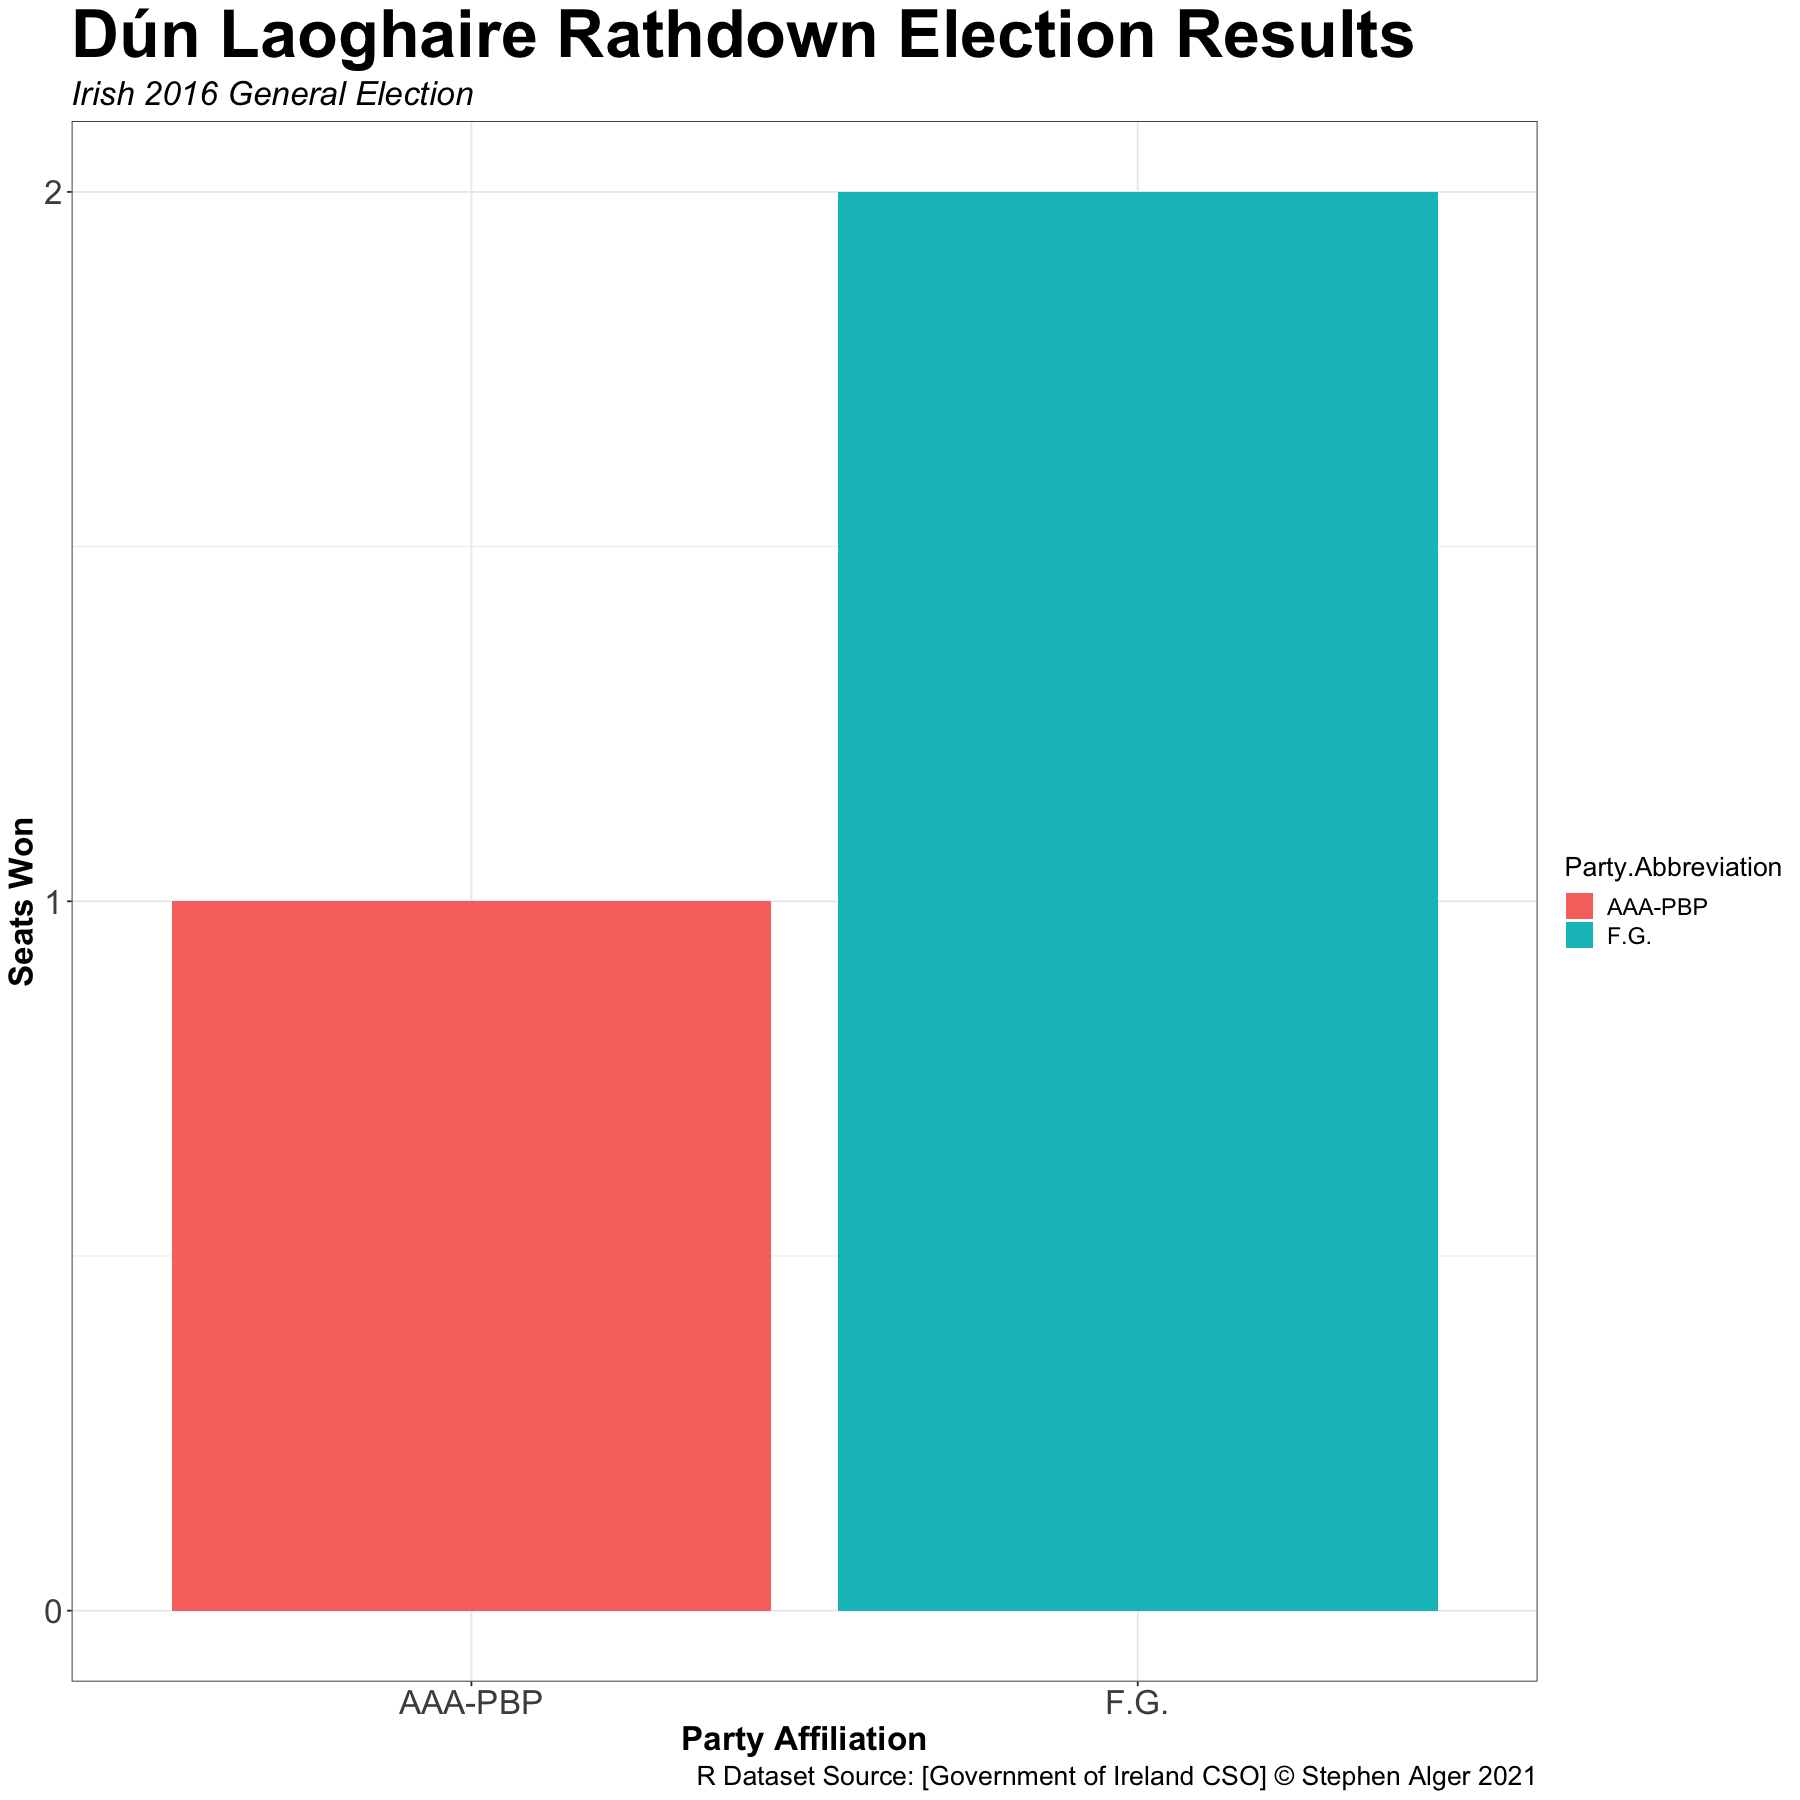

In [49]:
options(repr.plot.width=15, repr.plot.height=15)
fetchConstituencyElectedCandidates('"Dún Laoghaire"') %>%
    ggplot(aes(x=factor(Party.Abbreviation), fill=Party.Abbreviation)) +
    guides(color = guide_legend(override.aes = list(size = 40)))+
    geom_bar() +
    scale_y_continuous(breaks=seq(0,5,1))+
    labs(x = "Party Affiliation", y="Seats Won",
        title="Dún Laoghaire Rathdown Election Results",
        subtitle="Irish 2016 General Election",
        caption="R Dataset Source: [Government of Ireland CSO] © Stephen Alger 2021")+
    theme_bw()+my_Theme

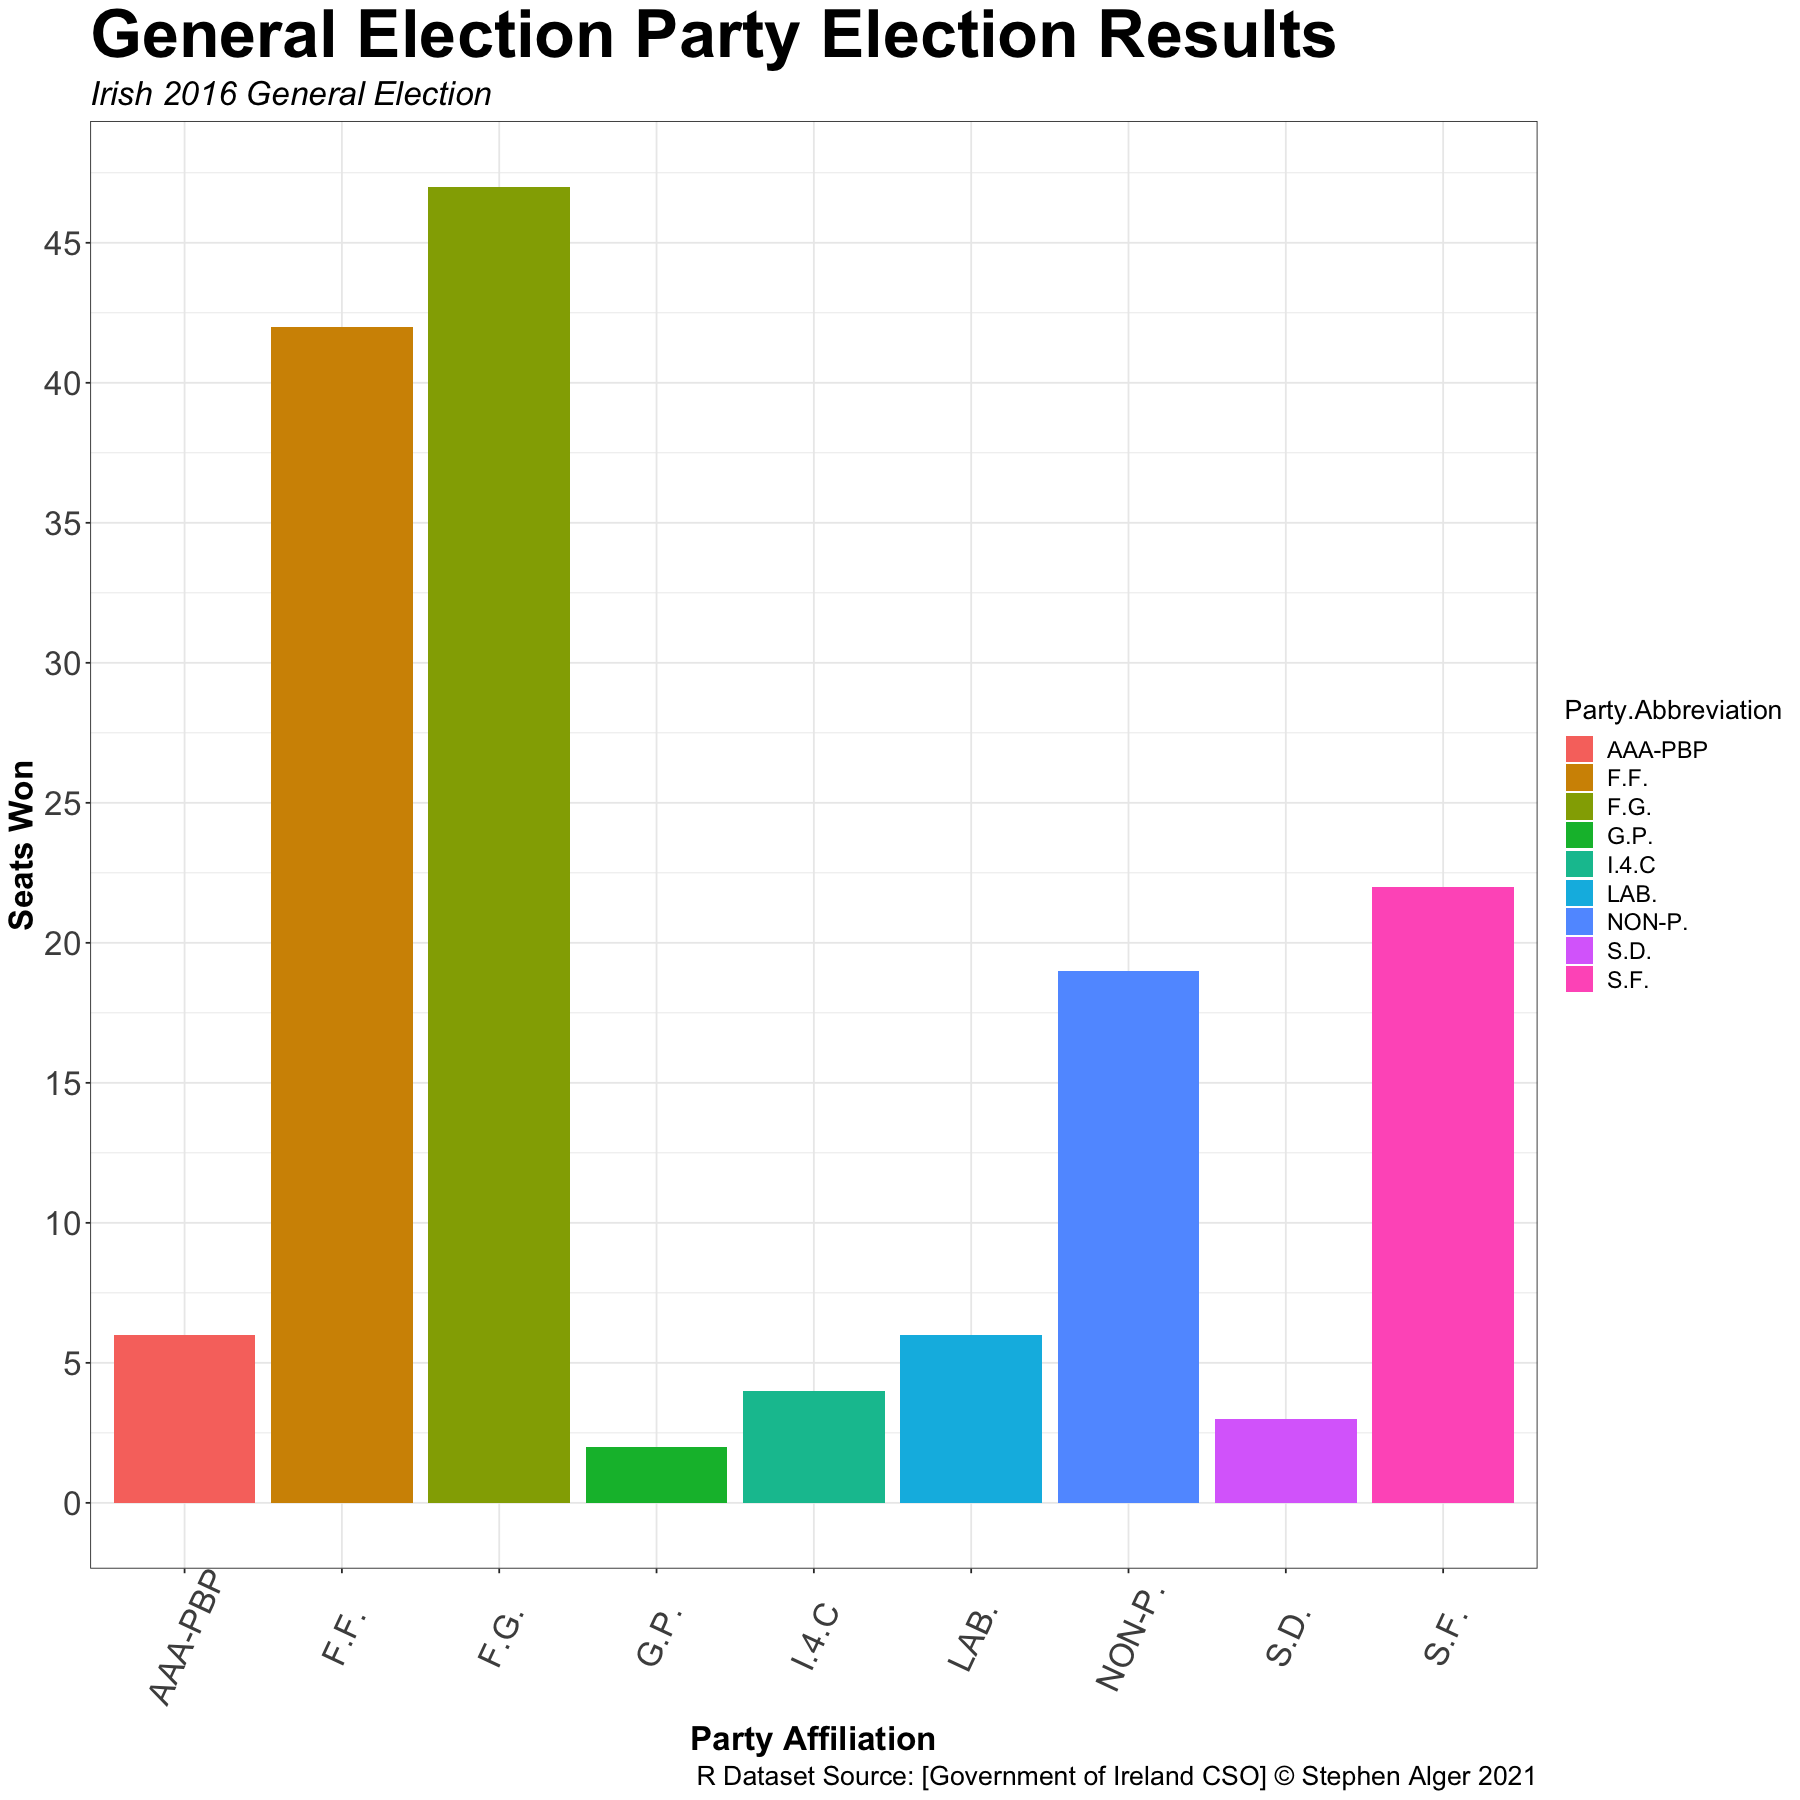

In [50]:
# 6-b) Country Wide Spread
# plot(edf$Party.Abbreviation)
options(repr.plot.width=15, repr.plot.height=15)
edf %>%
    ggplot(aes(x=factor(Party.Abbreviation), fill=Party.Abbreviation)) +
    guides(color = guide_legend(override.aes = list(size = 100)))+
    geom_bar() +
    scale_y_continuous(breaks=seq(0,50,5))+
    labs(x = "Party Affiliation", y="Seats Won",
        title="General Election Party Election Results",
        subtitle="Irish 2016 General Election",
        caption="R Dataset Source: [Government of Ireland CSO] © Stephen Alger 2021")+
    theme_bw()+my_Theme+theme(axis.text.x = element_text(angle=65, vjust=0.6))

In [51]:
head(edf)

,Candidate.First.Name,Candidate.surname,Constituency.Name,Gender,Party,Party.Abbreviation
,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
1,Bobby,Aylward,Carlow Kilkenny,M,Fianna Fáil,F.F.
2,Pat,Deering,Carlow Kilkenny,M,Fine Gael,F.G.
3,Kathleen,Funchion,Carlow Kilkenny,F,Sinn Féin,S.F.
4,John,McGuinness,Carlow Kilkenny,M,Fianna Fáil,F.F.
5,John Paul,Phelan,Carlow Kilkenny,M,Fine Gael,F.G.
6,Heather,Humphreys,Cavan Monaghan,F,Fine Gael,F.G.


In [52]:
# Manually Group Smaller parties As 'Other' -> Allowing for Clearer Graphing
edf$Party.Abbreviation <- mapply(gsub, pattern = "C.D.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "C.P.I", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "AAA-PBP", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "D.D.I", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "G.P.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "I.4.C.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "I.4.C", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "I.D.P.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "F.N.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "LAB.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "R.I.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "S.D.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "NON-P", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "W.D.", replacement = "Other", edf$Party.Abbreviation)
edf$Party.Abbreviation <- mapply(gsub, pattern = "Other.", replacement = "Other", edf$Party.Abbreviation)

In [53]:
partySplitdf = sqldf('Select "Party.Abbreviation",COUNT(*) FROM edf here GROUP BY "Party.Abbreviation"')
partySplitdf

Party.Abbreviation,COUNT(*)
<chr>,<int>
F.F.,42
F.G.,47
Other,40
S.F.,22


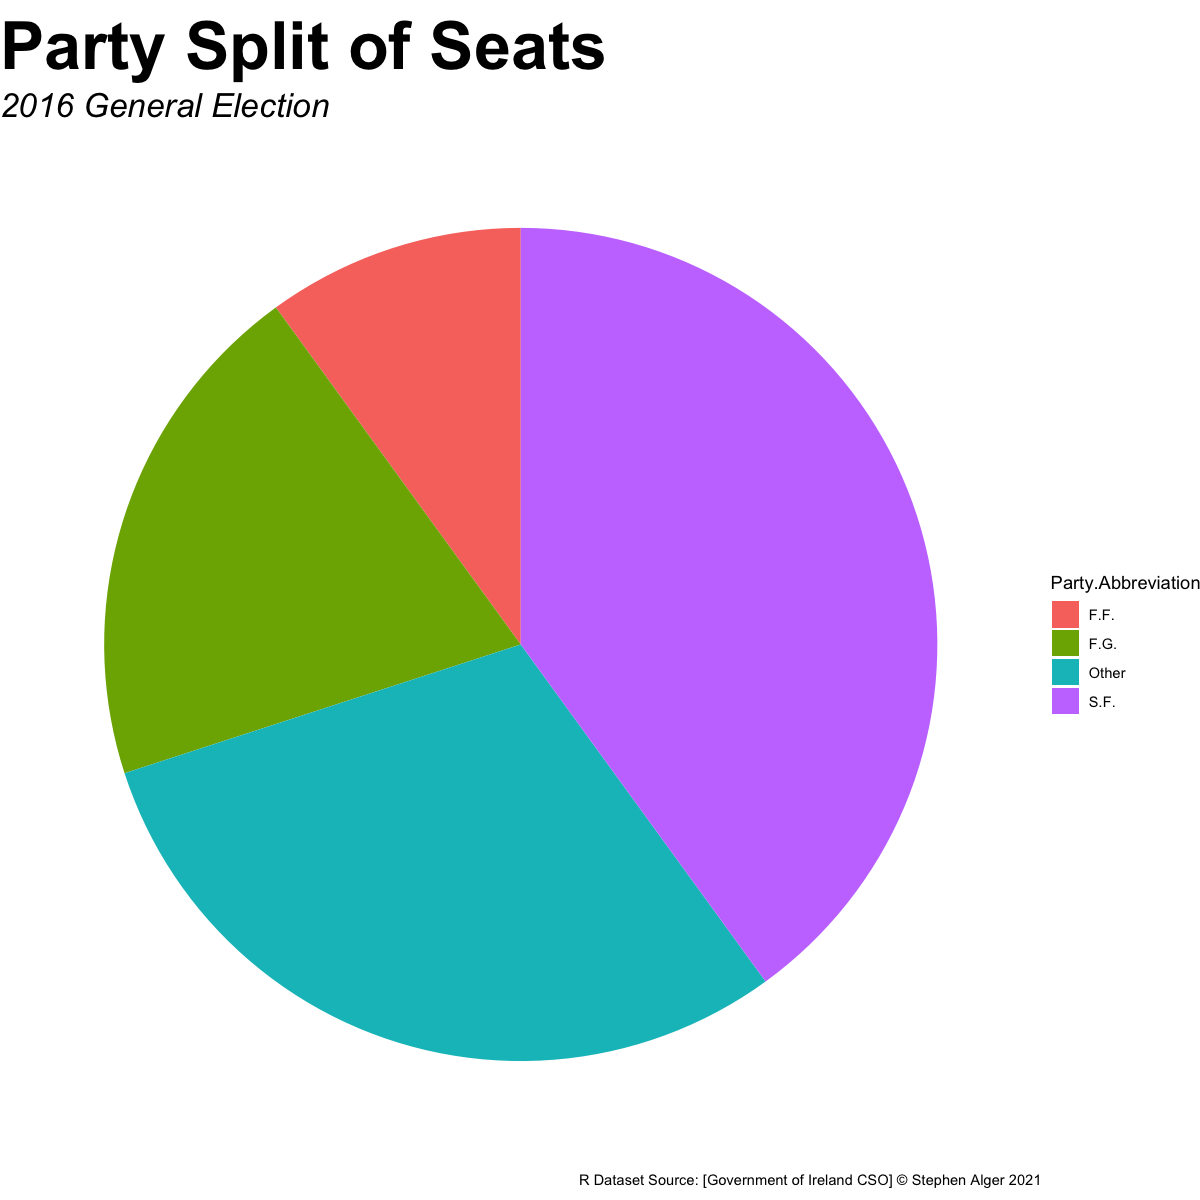

In [54]:
#Set Environment Plot Size:
options(repr.plot.width=10, repr.plot.height=10)

# This would Look Alot Better as a Pie Chart
partySplitdf %>%
    ggplot(aes(x = "", y=Party.Abbreviation, fill = Party.Abbreviation)) +
    geom_bar(stat="identity", width=1)+
    labs(x = NULL, y=NULL,
        title="Party Split of Seats",
        subtitle="2016 General Election",
        caption="R Dataset Source: [Government of Ireland CSO] © Stephen Alger 2021")+
        coord_polar(theta = "y", start=0)+theme_void()+theme(plot.title = element_text(face="bold",size=40),
                  plot.subtitle = element_text(face="italic", size = 20),axis.text = element_blank(),
        axis.ticks = element_blank(), panel.grid  = element_blank())

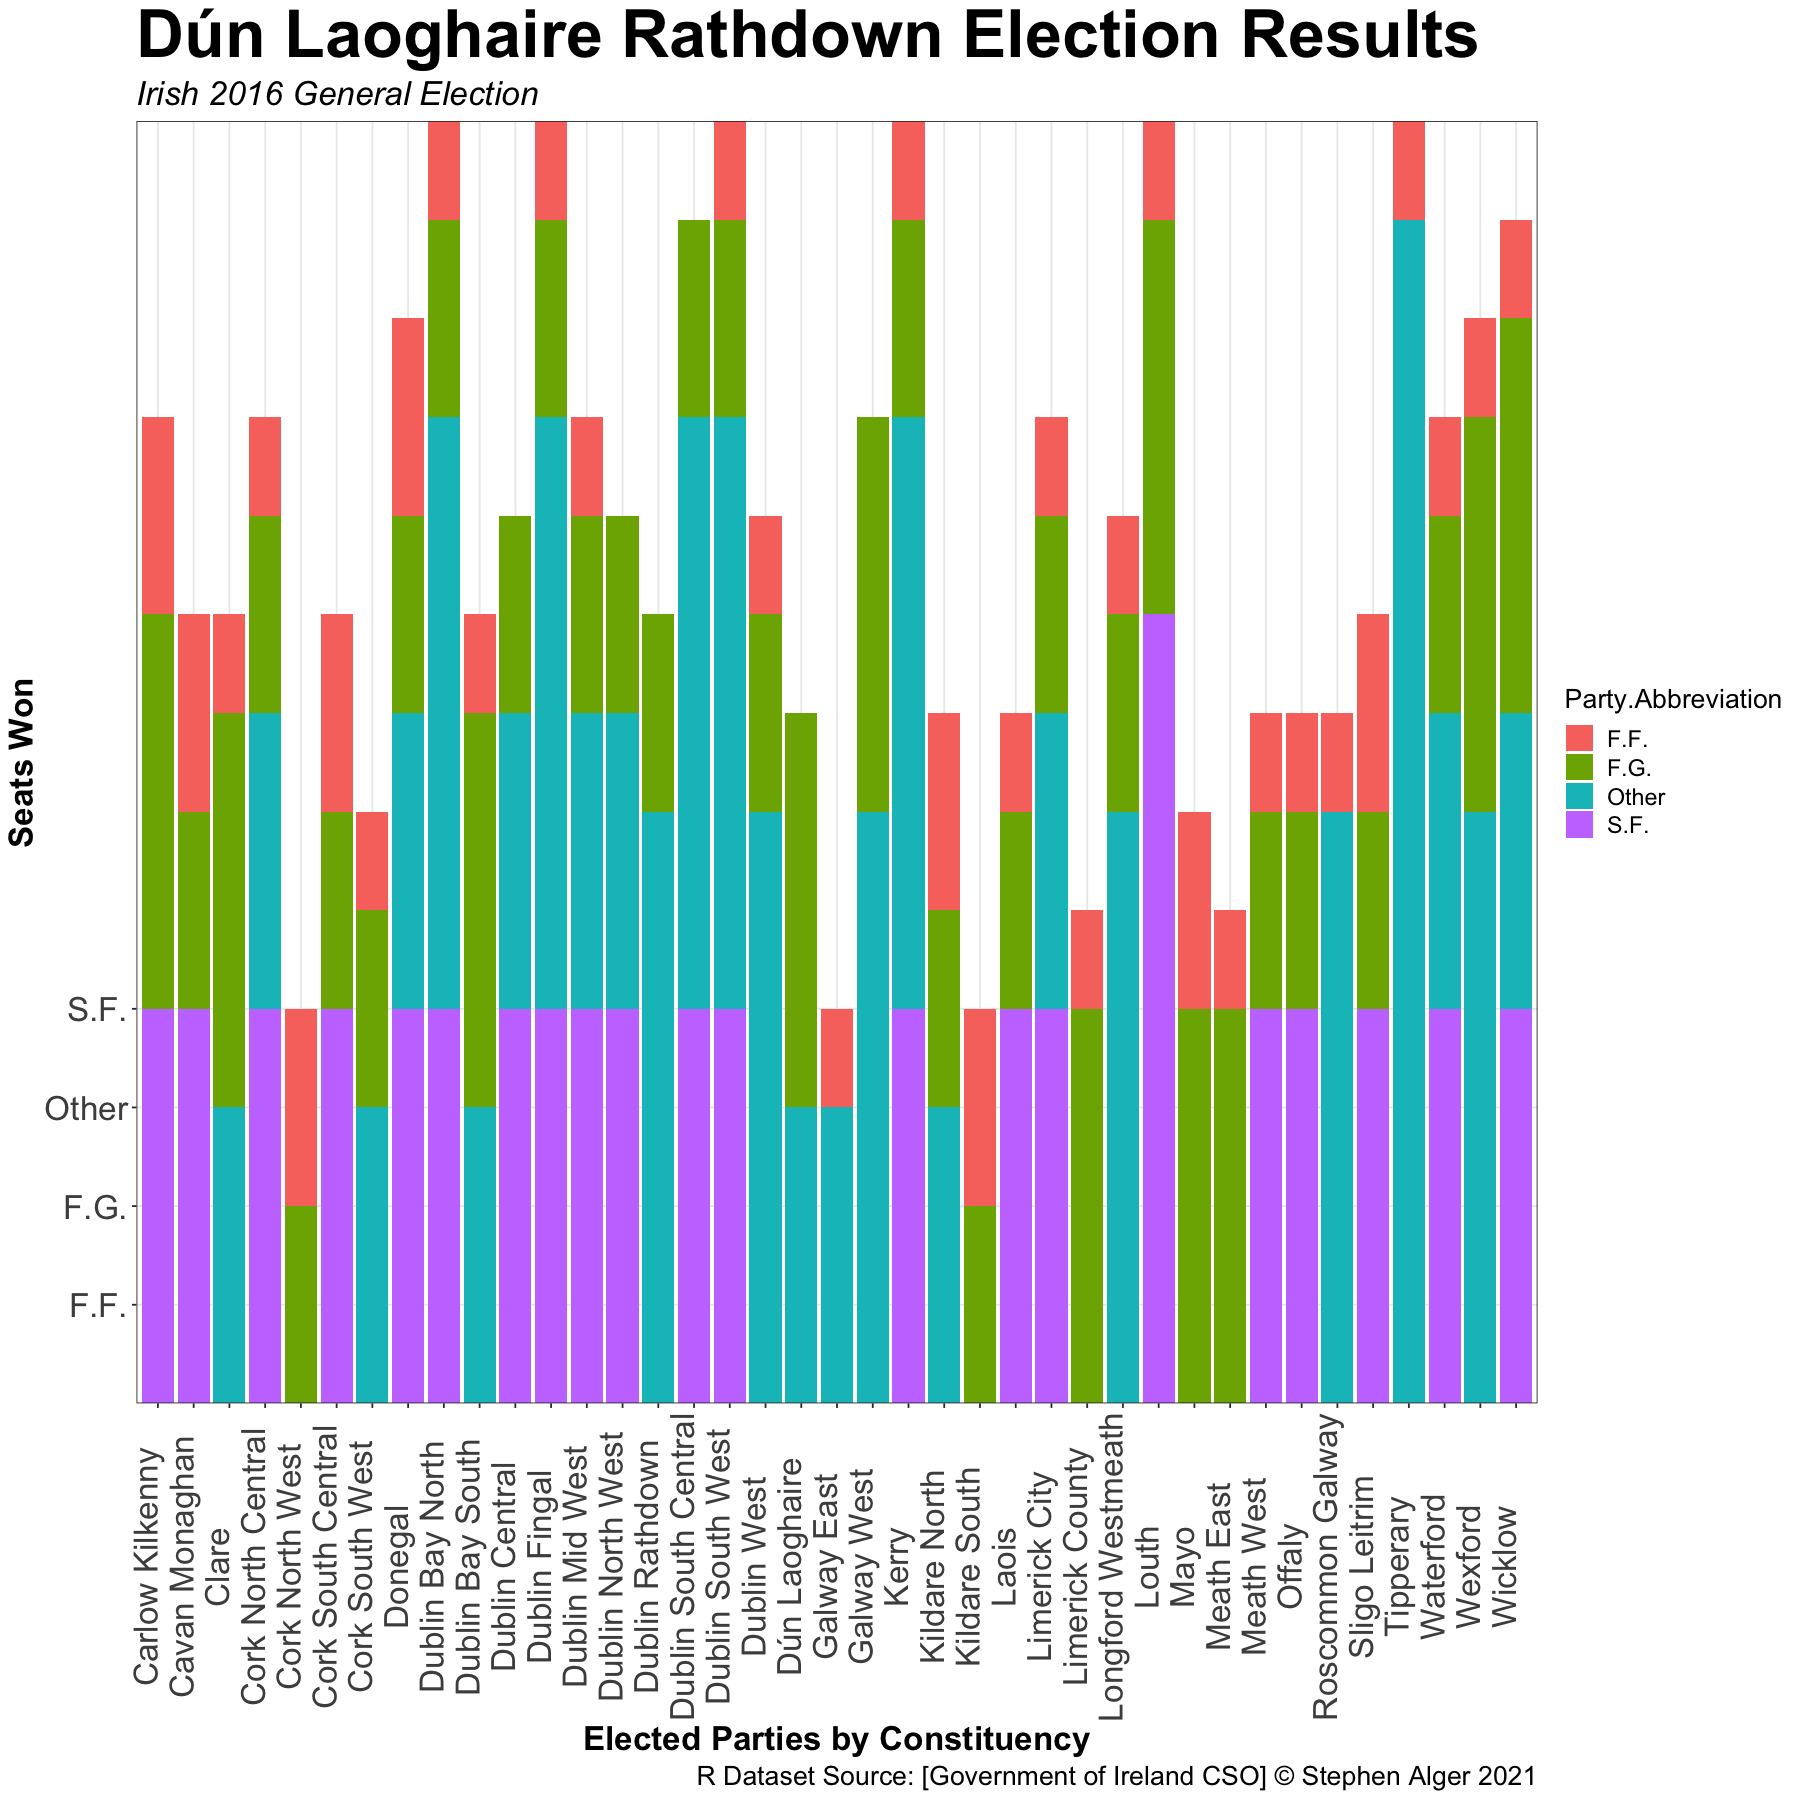

In [55]:
#Set Environment Plot Size:
options(repr.plot.width=15, repr.plot.height=15)

edf %>%
ggplot() +
    geom_col(aes(x = Constituency.Name, y= Party.Abbreviation,fill = Party.Abbreviation)) +
    labs(x = "Elected Parties by Constituency", y="Seats Won",
        title="Dún Laoghaire Rathdown Election Results",
        subtitle="Irish 2016 General Election",
        caption="R Dataset Source: [Government of Ireland CSO] © Stephen Alger 2021")+
    theme_bw()+my_Theme+theme(axis.text.x = element_text(angle=90, vjust=0))

---
# Week 7 - Continued Work
>This week, you can use your knowledge and skills to develop a series of visualisations based on the datasets acquired for Election 2016. As you know, there are three files in your Brightspace folder. All of these were supplied after the Irish General Election in 2016. In these elections, the country is divided into constituencies. Each constituency is represented by a specific number of TDs. These elections use proportional representation. A candidate is elected when he / she reaches the constituency quota, or is not eliminated when there is still a seat to be filled. Details of who won is given, however, you will need to have some understanding of the data to be able to generate correct charts.

In [71]:
# Reminder What the Data Looks Like
cat("\n\n--------------------------------\nColumns in Candidate Dataframe:\n--------------------------------\n",colnames(canddf))
cat("\n\n--------------------------------\nColumns in Constituency Dataframe:\n--------------------------------\n",colnames(constdf))
cat("\n\n--------------------------------\nColumns in Count Dataframe:\n--------------------------------\n",colnames(countdf))



--------------------------------
Columns in Candidate Dataframe:
--------------------------------
 Constituency.Name Surname First.Name Gender Party Party.Abbreviation Count.Number Required.To.Reach.Quota Required.To.Save.Deposit Votes Result Candidate.Id Constituency.Number Constituency.Ainm

--------------------------------
Columns in Constituency Dataframe:
--------------------------------
 Constituency.Name Constituency.Ainm Count.Number Date.Of.Election Number.Of.Candidates Number.of.Seats Quota Required.Save.Deposit Seats.Filled Seats.in.Constituency Spoiled Total.Electorate Total.Poll Valid.Poll Constituency.Number

--------------------------------
Columns in Count Dataframe:
--------------------------------
 Constituency.Name Surname First.Name Result Count.Number Non_Transferable Occurred.On.Count Required.To.Reach.Quota Required.To.Save.Deposit Transfers Votes Total.Votes Constituency.Number Candidate.Id

--- 
## 1. First Past the Post Visualisation per Country

--- 
## 2. First Past the Post Visualisation per Constituency

---
## 3. Targeted Constituency; Show Vote Progression Per Count

---
## 4. Countrywide show the following:
> a. how many male / female candidates ran.<br>
b. How many male / female candidates were elected. <br>
c. How many male/female candidates per party were elected. <br>

---
## 5. Generate Charts

In [72]:
# Bar Chart

In [73]:
# Line Chart

In [74]:
# Stacked Bar Chart

In [75]:
# Scatter Plot

In [76]:
# Stepped Chart

In [77]:
# Histogram

In [78]:
# Area Chart

In [79]:
# Stacked Area Chart

In [80]:
# Stream Graph